Data Visualization for the Dataset Heart.csv downloaded from Kaggle
Link to downloads Dataset:                                                  Heart.csv (https://www.kaggle.com/zhaoyingzhu/heartcsv)
:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
from google.colab import files


uploaded = files.upload()


Saving Heart.csv to Heart.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


In [5]:
# Check for missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of object type (likely string)
        # Handle non-numeric columns (e.g., fill with mode or a placeholder)
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())  # Fill numeric columns with mean

# Display summary statistics
print(df.describe())

       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003 

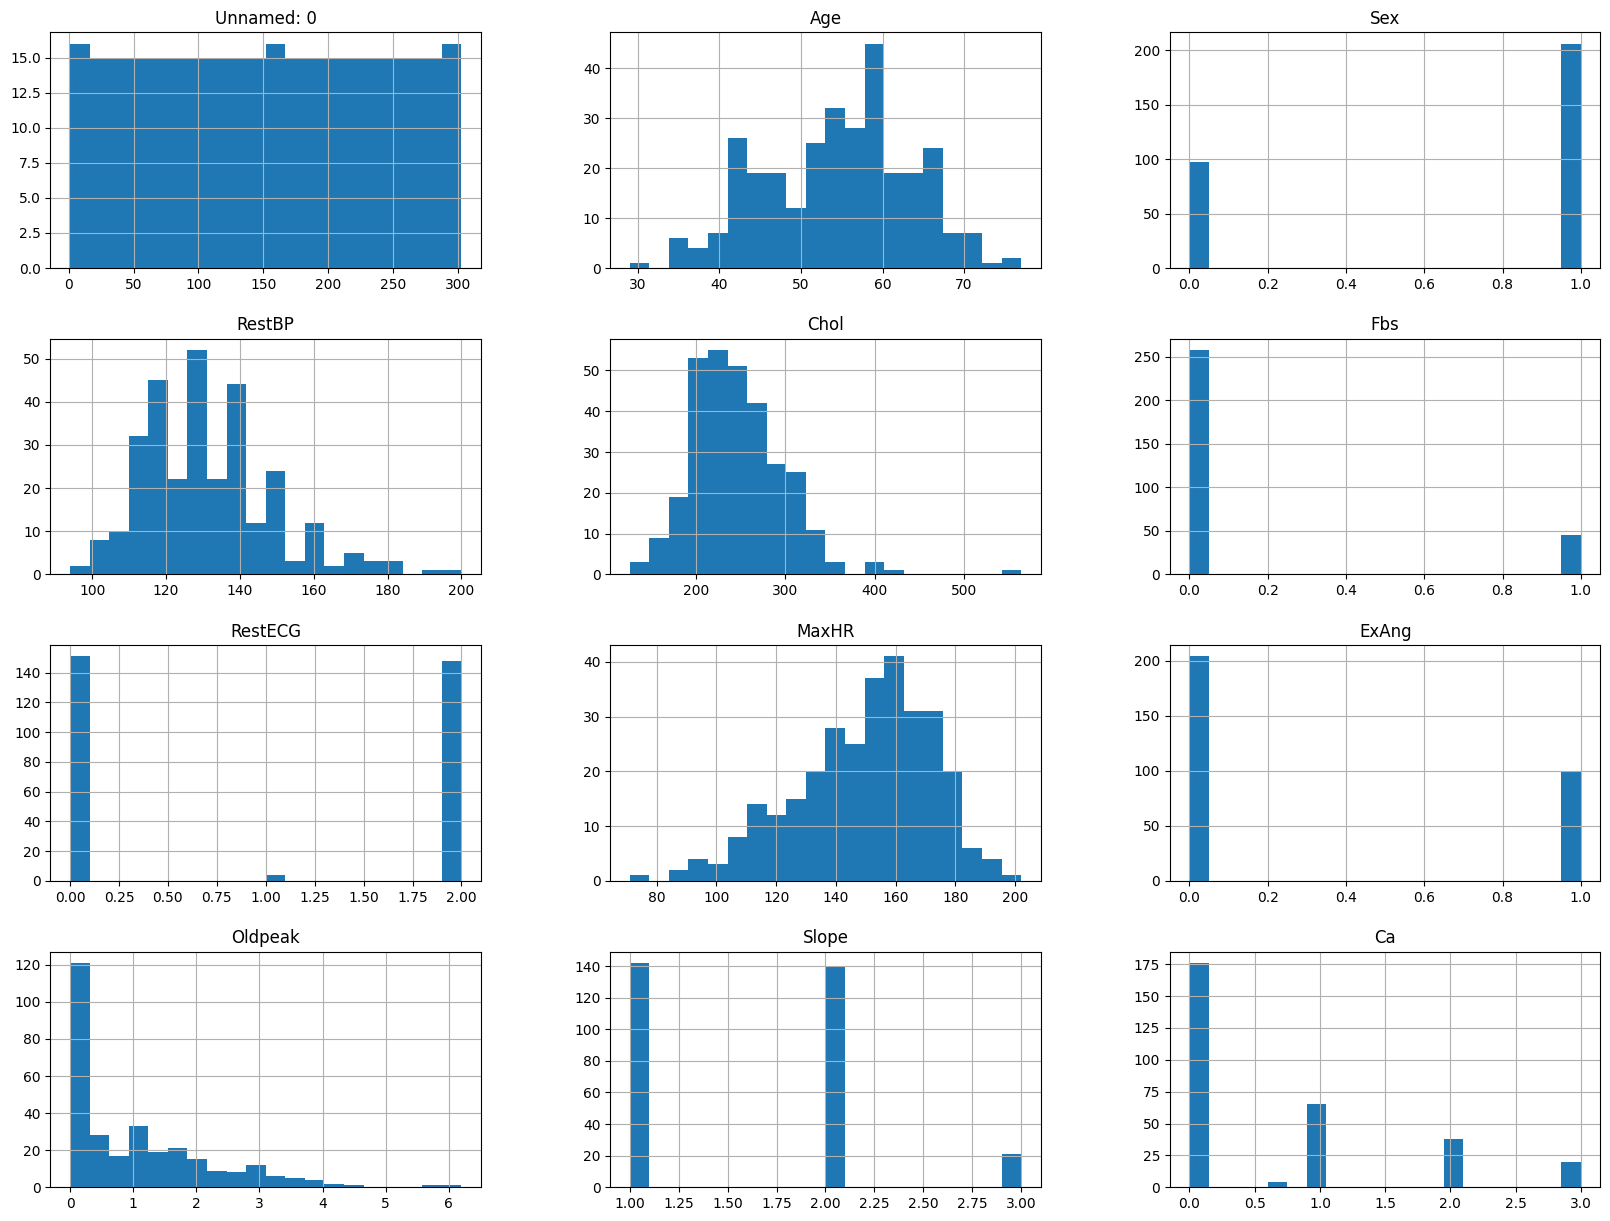

In [6]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

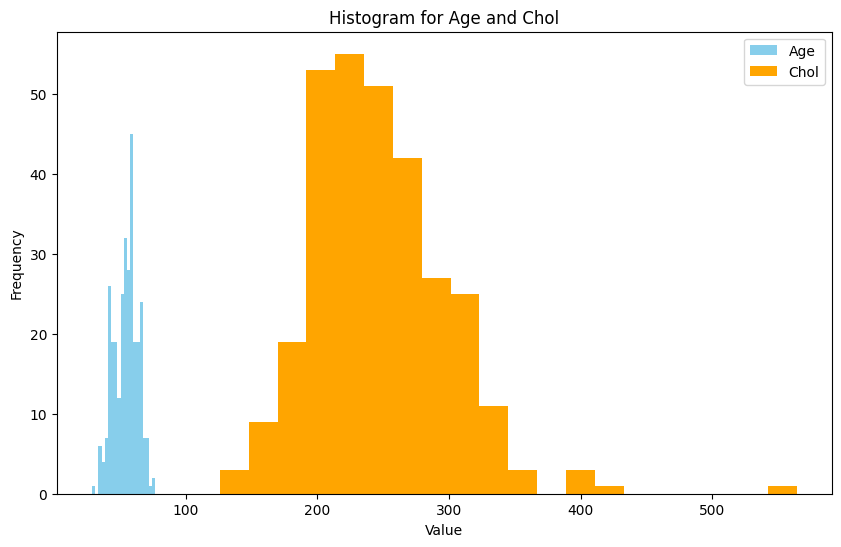

In [7]:
# Draw histogram for any two suitable attributes
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', label='Age')
plt.hist(df['Chol'], bins=20, color='orange', label='Chol')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Age and Chol')
plt.legend()
plt.show()

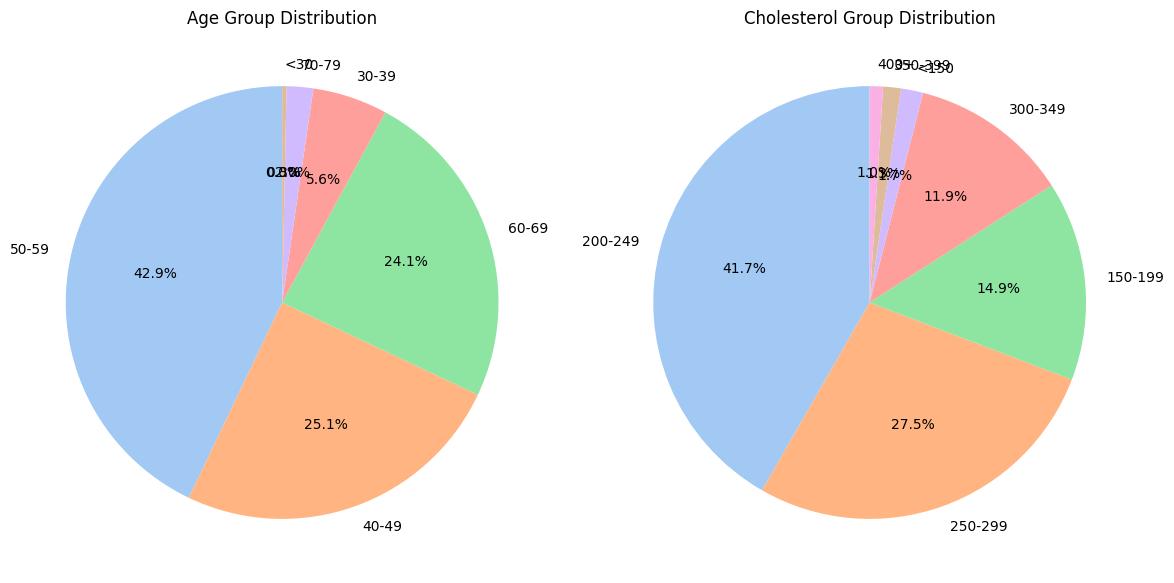

In [8]:
#Pie Charts

# Categorize "age" into age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Categorize "chol" into cholesterol ranges
df['chol_group'] = pd.cut(df['Chol'], bins=[0, 150, 200, 250, 300, 350, 400, 500], labels=['<150', '150-199', '200-249', '250-299', '300-349', '350-399', '400+'])

# Pie chart for "age_group"
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['age_group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Age Group Distribution')
plt.ylabel('')  # Hide the y-label for the pie chart

# Pie chart for "chol_group"
plt.subplot(1, 2, 2)
df['chol_group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Cholesterol Group Distribution')
plt.ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()


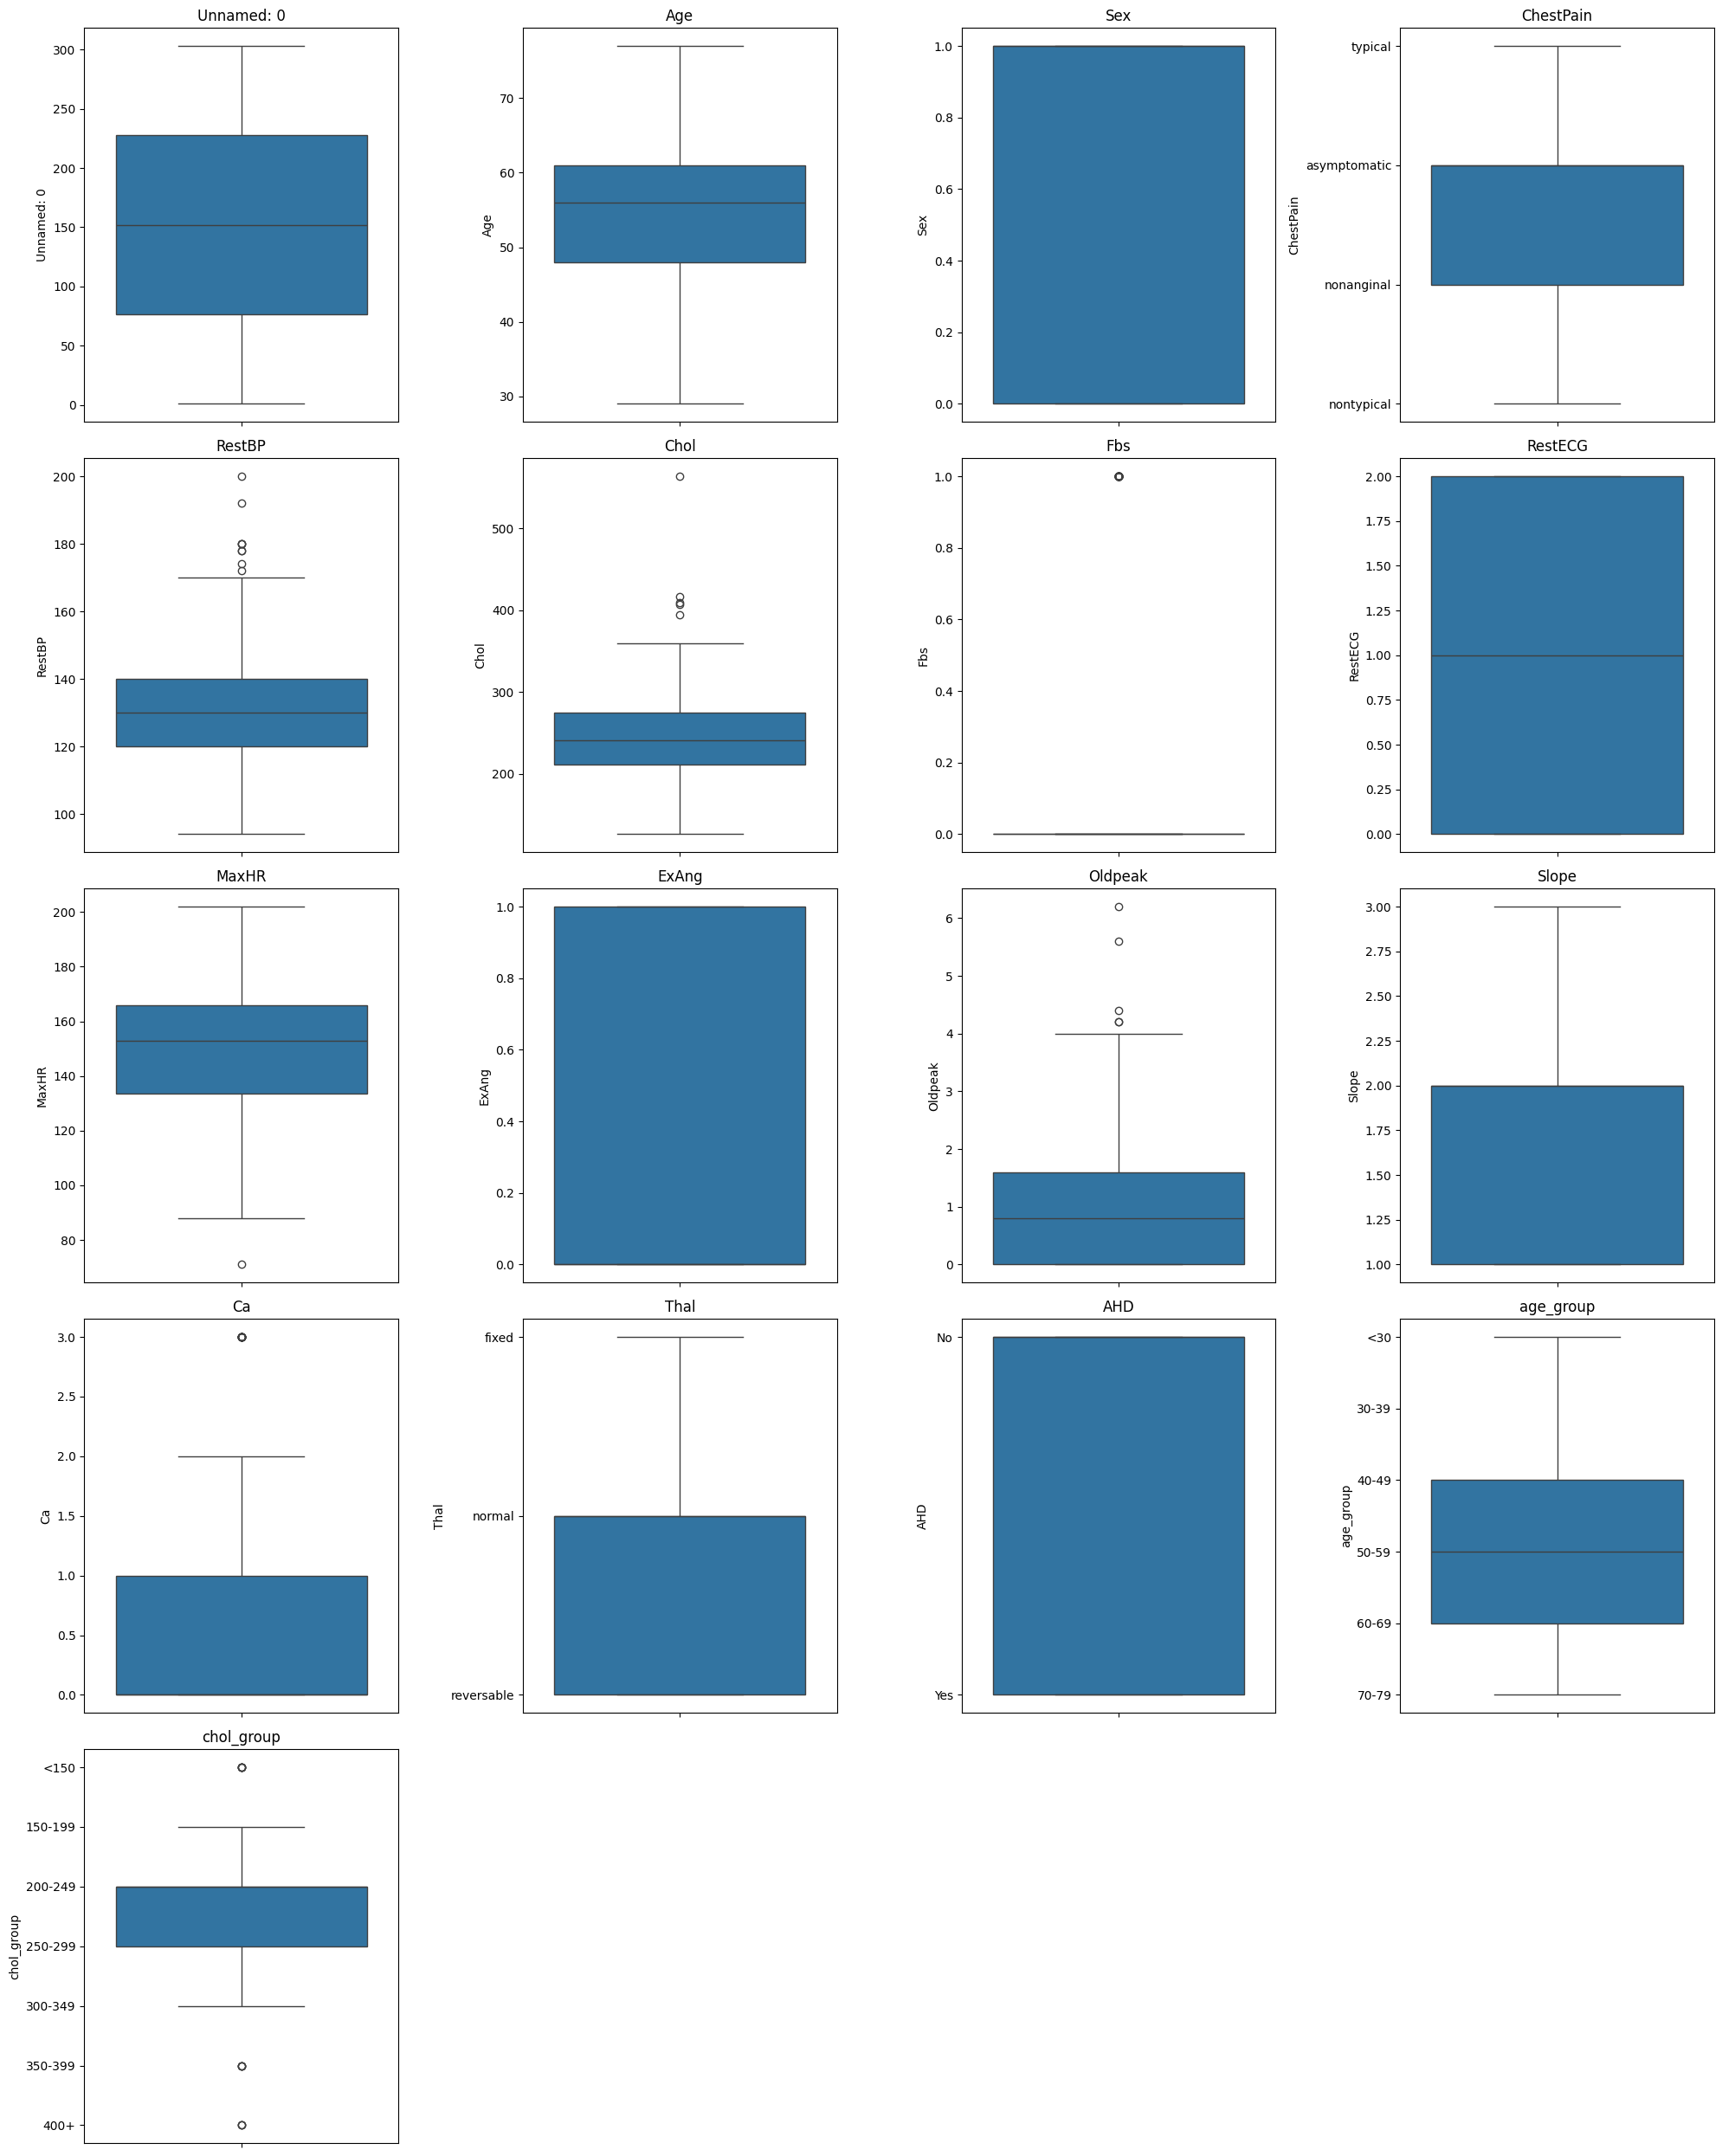

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots, adjusting the grid size
num_columns = len(df.columns)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on rows

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: >

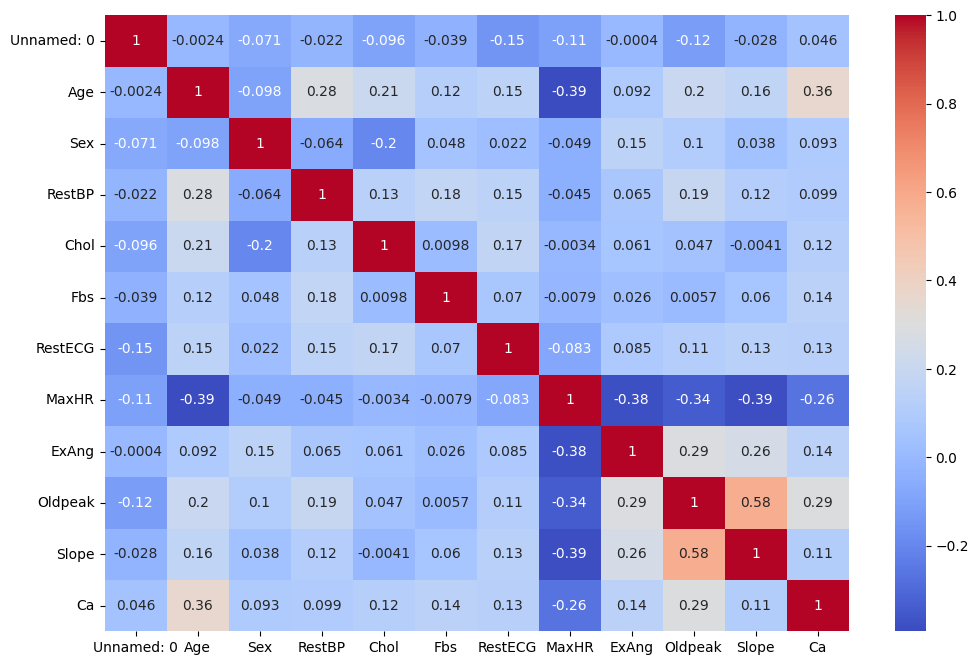

In [12]:


# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example: drop them)
df_numeric = df.drop(non_numeric_cols, axis=1)

# Compute the correlation matrix on the numeric DataFrame
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [13]:
# Scatter plots for selected pairs of features
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Age vs. Cholesterol')

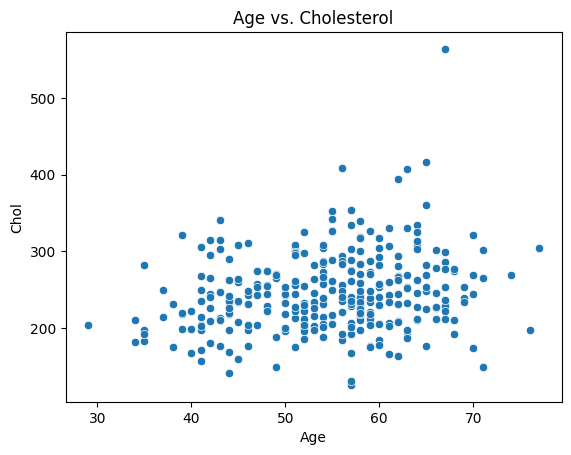

In [14]:
# Pair 1: Age vs. Cholesterol
plt.subplot(1, 1, 1)
sns.scatterplot(x='Age', y='Chol', data=df)
plt.title('Age vs. Cholesterol')

Text(0.5, 1.0, 'Age vs. Max Heart Rate')

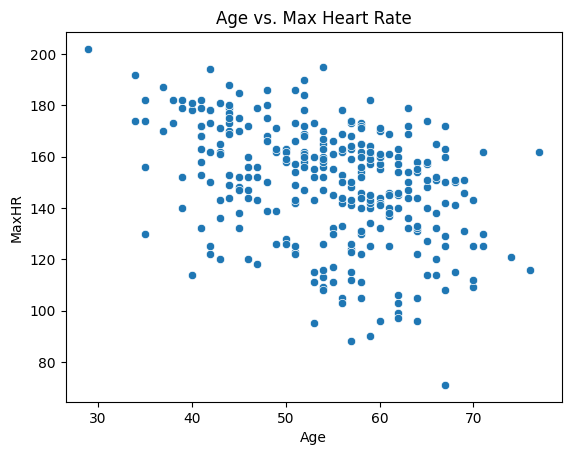

In [15]:
# Pair 2: Age vs. Max Heart Rate
plt.subplot(1, 1, 1)
sns.scatterplot(x='Age', y='MaxHR', data=df)
plt.title('Age vs. Max Heart Rate')

In [22]:
# Check for missing values
print(df.isnull().sum())

if 'Fbs' not in df.columns:
    df.rename(columns={'Fbs': 'Fbs'}, inplace=True)

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Fbs'])
y = df['Fbs']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify non-numeric columns in the training set
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example: drop them)
X_train_numeric = X_train.drop(non_numeric_cols, axis=1)
X_test_numeric = X_test.drop(non_numeric_cols, axis=1) # Apply the same transformation to the test set

# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric) # Use the fitted scaler to transform the test set


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
age_group     0
chol_group    1
dtype: int64


In [33]:
# Training the Logistic Regression model
# Training the Logistic Regression model
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%') # Multiply by 100 and format as percentage
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)






Accuracy: 80.33%
Precision: 0.00
F1 Score: 0.00
Confusion Matrix:
[[49  0]
 [12  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        49
           1       0.00      0.00      0.00        12

    accuracy                           0.80        61
   macro avg       0.40      0.50      0.45        61
weighted avg       0.65      0.80      0.72        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde